In [1]:
import pandas as pd
from pylab import rcParams
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

### Getting data and diplaying first 5 rows:

In [2]:
file_name1="athlete_events.csv"
file_name2="noc_regions.csv"

In [3]:
#if reading from swift
import urllib

target_url1="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_d22d1e3f28be45209ba8f660295c84cf/hackaton/athlete_events.csv"
urllib.request.urlretrieve(target_url1, file_name1)

target_url2="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_d22d1e3f28be45209ba8f660295c84cf/hackaton/noc_regions.csv"
urllib.request.urlretrieve(target_url2, file_name2)

('noc_regions.csv', <http.client.HTTPMessage at 0x7fcf2f531c50>)

In [4]:
athlete = pd.read_csv(file_name1) 
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athlete.shape

(271116, 15)

In [6]:
noc = pd.read_csv(file_name2) 
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
noc.shape

(230, 3)

In [8]:
olympics = pd.merge(athlete,noc,how='left',on="NOC")

In [9]:
olympics.shape

(271116, 17)

### Number of participants by year

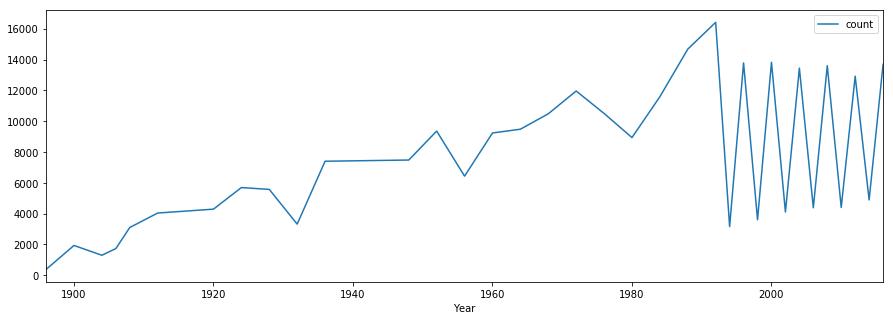

In [11]:
rcParams['figure.figsize'] = 15, 5
olympics.groupby(["Year"]).size().reset_index(name="count").sort_values(by=['Year']).set_index("Year").plot()

### Number of participants by year and by season: Winter or Summer

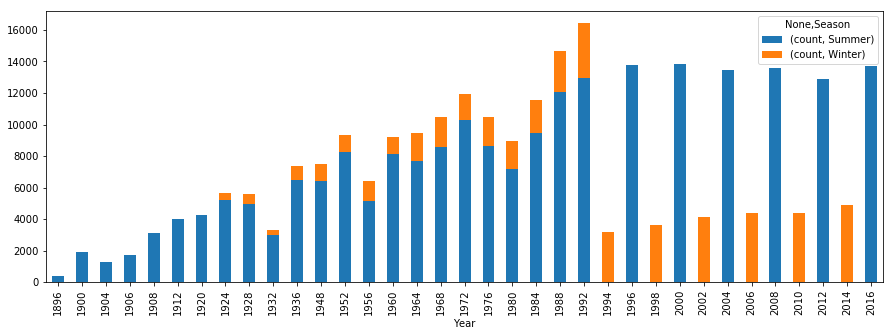

In [12]:
rcParams['figure.figsize'] = 15, 5
olympics.groupby(["Year","Season"]).size().reset_index(name="count").sort_values(by=['Year']).\
                                      pivot(index="Year",columns="Season").plot.bar(stacked=True)

###  How many male/female participands in winter/summer olympics by year
(count and percentage)

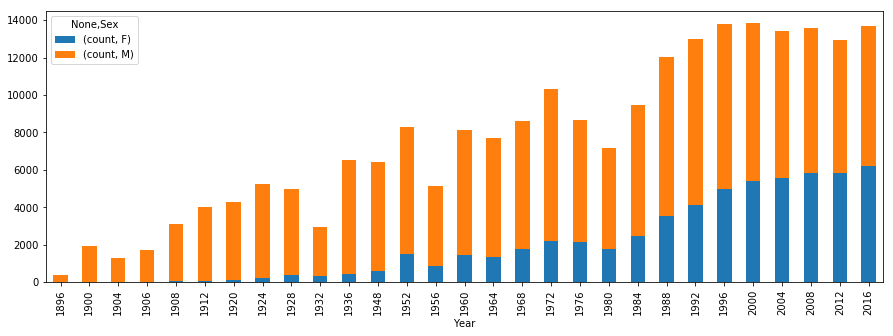

In [13]:
rcParams['figure.figsize'] = 15, 5
olympics[olympics["Season"]=="Summer"].groupby(["Year","Sex"]).size().reset_index(name="count").sort_values(by=['Year']).\
                                      pivot(index="Year",columns="Sex").plot.bar(stacked=True)

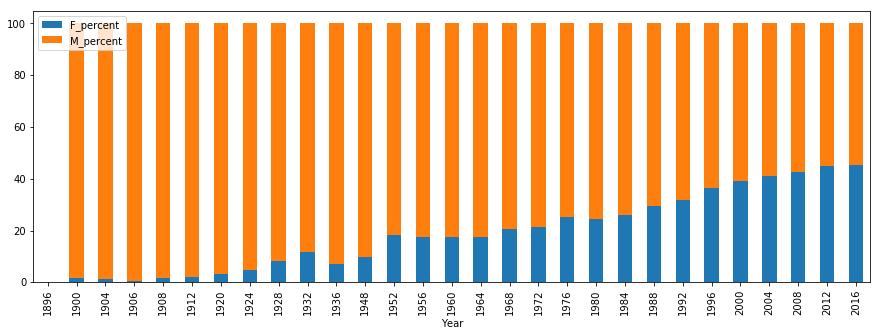

In [14]:
df = olympics[olympics["Season"]=="Summer"].groupby(["Year","Sex"]).size().reset_index(name="count").sort_values(by=['Year']).\
                                      pivot(index="Year",columns="Sex",values="count").reset_index().rename_axis(None,axis="columns").set_index("Year")
df["F_percent"]=df["F"]/(df["F"]+df["M"])*100
df["M_percent"]=df["M"]/(df["F"]+df["M"])*100
df=df.drop(columns=["F","M"])
df.plot.bar(stacked=True)

### Athlets weight /hight/age distribution by male and female

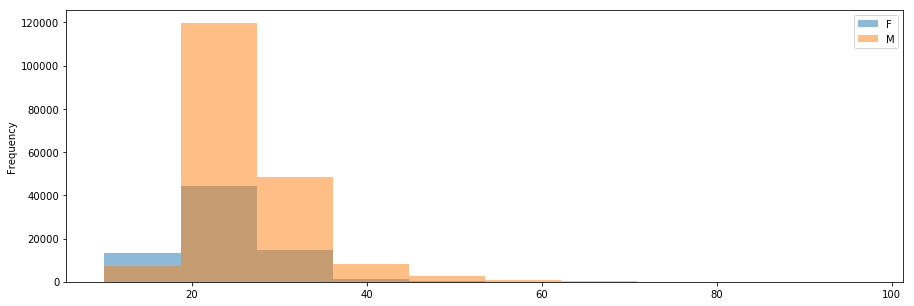

In [15]:
olympics.pivot(columns="Sex",values="Age").rename_axis(None,axis="columns").plot.hist(alpha=0.5)

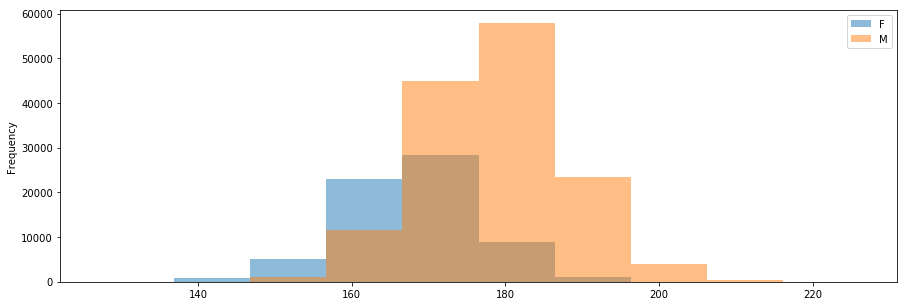

In [16]:
olympics.pivot(columns="Sex",values="Height").rename_axis(None,axis="columns").plot.hist(alpha=0.5)

### Number of athlets by sport by year

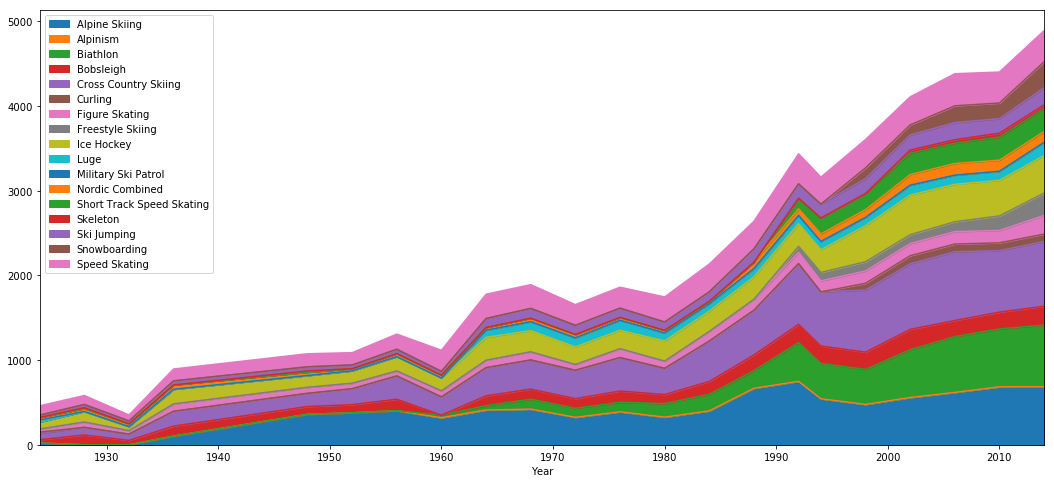

In [29]:
rcParams['figure.figsize'] = 18, 8
olympics[olympics["Season"]=="Winter"].groupby(["Sport", "Year"]).size().reset_index(name="count").\
              pivot(index="Year", columns='Sport',values="count").reset_index().rename_axis(None,axis="columns").set_index("Year").plot.area()

### Number of medals by country by sport

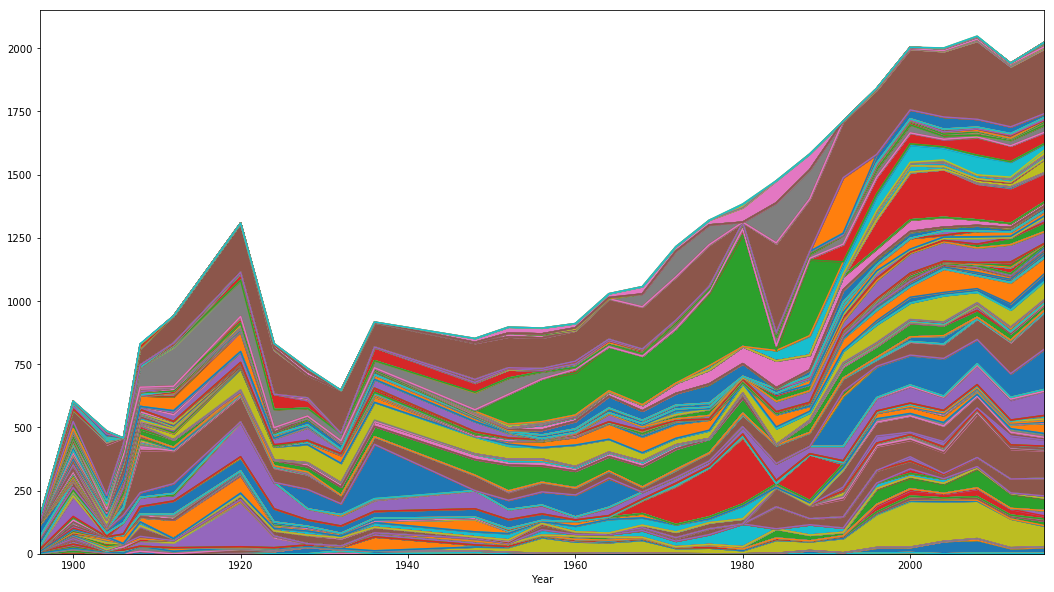

In [17]:

rcParams['figure.figsize'] = 18, 10
olympics[olympics["Season"]=="Summer"].dropna(subset=["Medal"]).groupby(["Team", "Year"]).size().reset_index(name="count").\
              pivot(index="Year", columns='Team',values="count").reset_index().rename_axis(None,axis="columns").set_index("Year").\
              plot.area(legend=False)

### Number of medals for Canada by year and by season

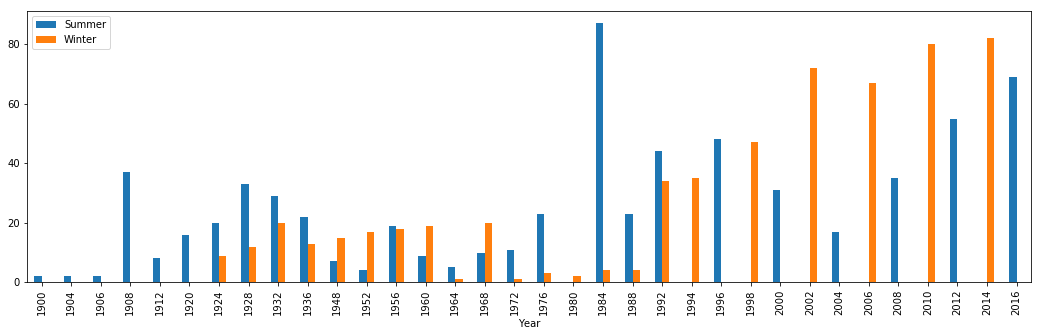

In [18]:
rcParams['figure.figsize'] = 18, 5
olympics[olympics["Team"]=="Canada"].dropna(subset=["Medal"]).groupby(["Season", "Year"]).size().reset_index(name="count").\
              pivot(index="Year", columns='Season',values="count").reset_index().rename_axis(None,axis="columns").set_index("Year").plot.bar()

### For Summer olympics 1984 how many gold/silver/bronze medals in total and by sport

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf21d7a2b0>],
      dtype=object)

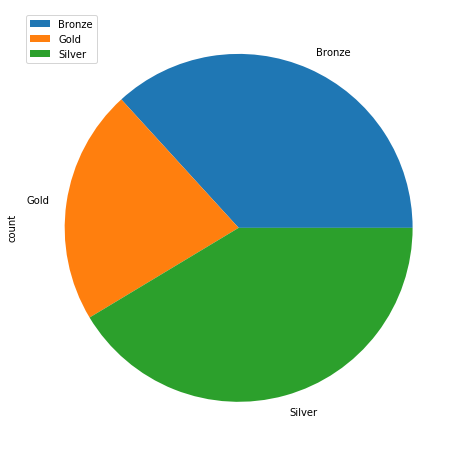

In [34]:
olympics[(olympics["Season"]=="Summer") &(olympics["Team"]=="Canada") & (olympics["Year"]==1984)].\
         dropna(subset=["Medal"]).groupby(["Medal"]).size().reset_index(name="count").set_index("Medal").plot(kind="pie",subplots=True)

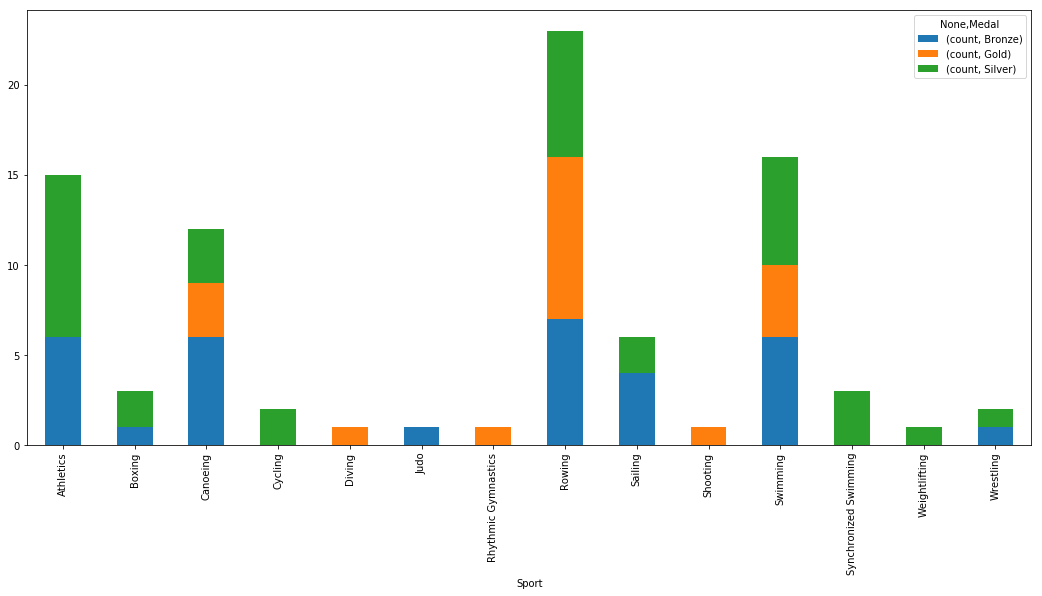

In [24]:
olympics[(olympics["Season"]=="Summer") &(olympics["Team"]=="Canada") & (olympics["Year"]==1984)].\
         dropna(subset=["Medal"]).groupby(["Sport","Medal"]).size().reset_index(name="count").\
                                      pivot(index="Sport",columns="Medal").plot.bar(stacked=True)

### For Summer olympics 1984 how athlets by sport

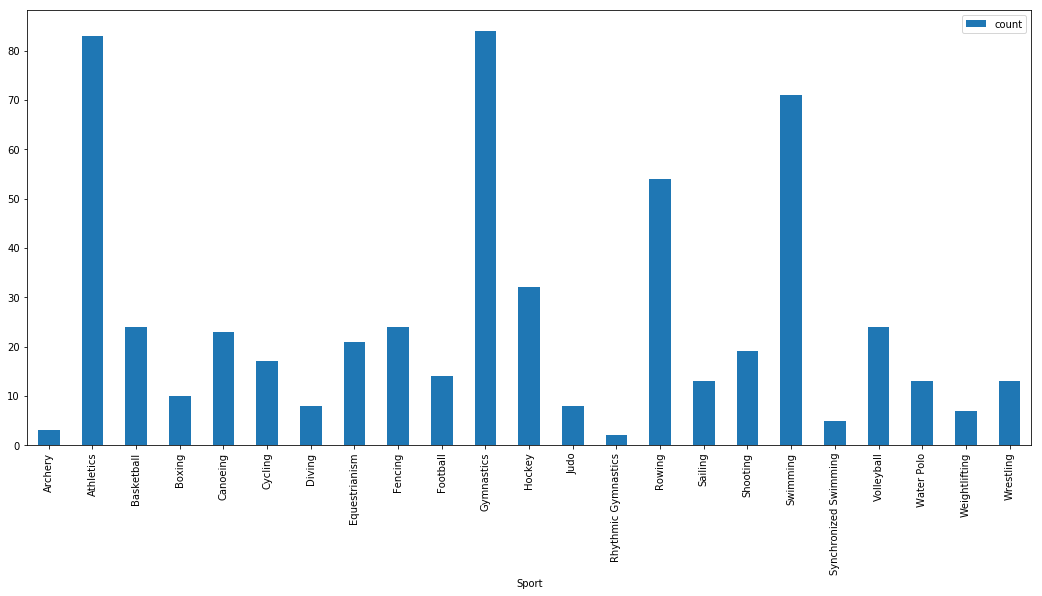

In [27]:
olympics[(olympics["Season"]=="Summer") &(olympics["Team"]=="Canada") & (olympics["Year"]==1984)].\
         groupby(["Sport"]).size().reset_index(name="count").set_index("Sport").plot.bar()